# MLPClassifier Example

We train a simple NN to solve a classification problem.

We consider the Iris data set, which contains information about flowers. Each flower is described by 4 attributes (petal and sepal dimensions) and belongs to one of 3 Iris species.

**Note**: this is a simplified example of multiclass classification, where we will use a single-output NN to predict the number of the class. A better approach would require a softmax output layer to predict the probability of the input belonging to each class and the cross-entropy loss function.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)


iris = load_iris()

# We only consider petal dimensions to simplify the data set
X = iris.data

# We are only interested in classifying Setosa instances (wich are linearly separable from the others)
y = (iris.target == 0).astype(int) # Iris Setosa?

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=1)

In [25]:
display(X_train[:5,:])
display(y_train[:5])

array([[6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4]])

array([1, 2, 1, 2, 2])

Let's visualize the training set (we only consider 2 features here)

/tmp/ipykernel_6593/2341937679.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


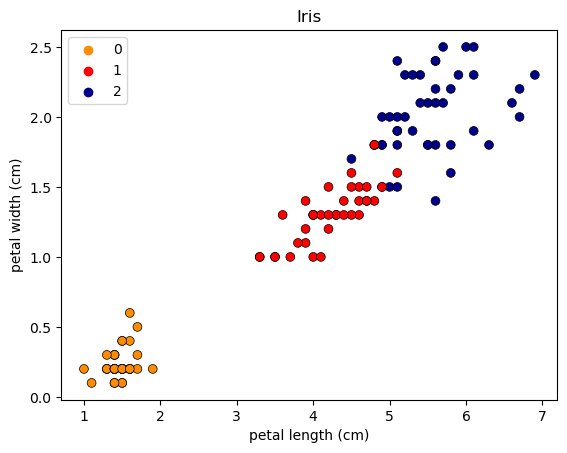

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap_bold = ["darkorange", "red", "darkblue", "green", "black"]

_, ax = plt.subplots()

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

# Plot also the training points
sns.scatterplot(
    x=X_train[:, 2],
    y=X_train[:, 3],
    palette=cmap_bold,
    hue=y_train,
    s=40,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "Iris"
)

plt.show()


In [3]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X_train, y_train)

acc = accuracy_score(per_clf.predict(X_train), y_train)
print(f"[Perceptron] Training Set Accuracy: {100*acc:.2f} %")


[Perceptron] Training Set Accuracy: 69.17 %


In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500)
mlp.fit(X_train,y_train) 

acc = accuracy_score(mlp.predict(X_train), y_train)
print(f"[MLP] Training Set Accuracy: {100*acc:.2f} %")

[MLP] Training Set Accuracy: 97.50 %


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'hidden_layer_sizes': [(10,), (20,), (40,), (80,)], 'activation': ["relu", "logistic"]},
  ]

mlp = MLPClassifier(max_iter=500)
# train across 5 folds
grid_search = GridSearchCV(mlp, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)



89.2 % {'activation': 'relu', 'hidden_layer_sizes': (10,)}
96.7 % {'activation': 'relu', 'hidden_layer_sizes': (20,)}
98.3 % {'activation': 'relu', 'hidden_layer_sizes': (40,)}
96.7 % {'activation': 'relu', 'hidden_layer_sizes': (80,)}
85.0 % {'activation': 'logistic', 'hidden_layer_sizes': (10,)}
97.5 % {'activation': 'logistic', 'hidden_layer_sizes': (20,)}
96.7 % {'activation': 'logistic', 'hidden_layer_sizes': (40,)}
97.5 % {'activation': 'logistic', 'hidden_layer_sizes': (80,)}


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"{mean_score*100:.1f} %", params)